In [1]:
import numpy as np
import matplotlib.pyplot as plt

t, sum(U) =  1.120, 2.950899562768526e+01
t, sum(U) =  2.080, 2.919581784069726e+01
t, sum(U) =  3.040, 2.882559382707021e+01
t, sum(U) =  4.000, 2.844707203782329e+01
t, sum(U) =  5.120, 2.805347403459629e+01
t, sum(U) =  6.080, 2.776972406184671e+01
t, sum(U) =  7.040, 2.752954627848067e+01
t, sum(U) =  8.000, 2.732509194329981e+01
t, sum(U) =  9.120, 2.712236462113955e+01
t, sum(U) = 10.080, 2.697313157771280e+01


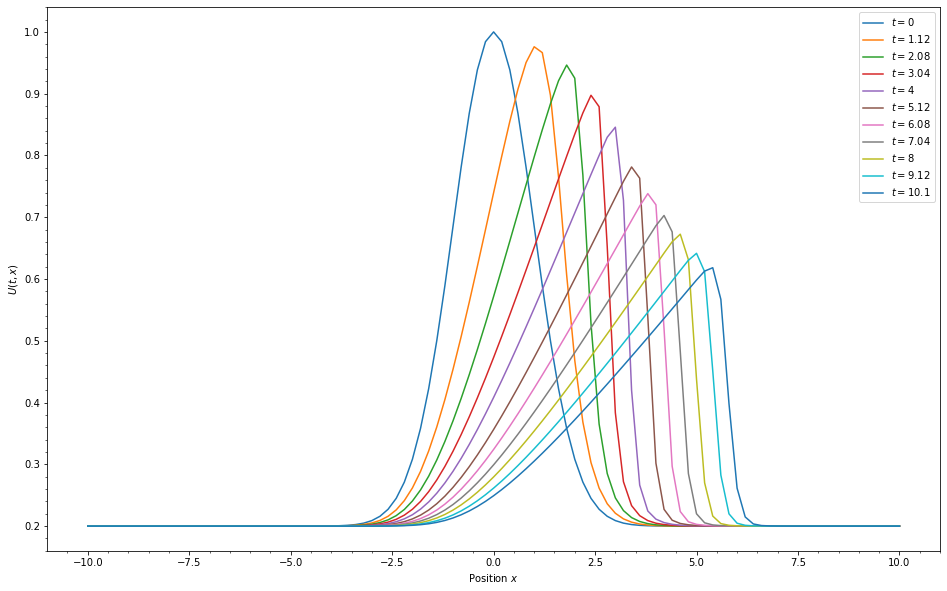

In [7]:
# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    Uold = np.copy(U)
    for ix in range(1, Nx - 1):
        vel = Uold[ix]
        if vel > 0:
            U[ix] = Uold[ix] - vel * dt / dx * (Uold[ix] - Uold[ix-1])
        else:
            U[ix] = Uold[ix] - vel * dt / dx * (Uold[ix+1] - Uold[ix])
    t += dt

    # Monitor total U after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        print("t, sum(U) = {:>6.3f}, {:>18.15e}".format(t, U[1:-1].sum()))
        tout += dtout

ax.legend()
plt.show()